# Applying the best line derived from HSTxPS1(Stack) catalog for separating star/galaxy in SDSSxPS1(Stack) catalog

I derived the best line for separating star/galaxy in HSTxPS1(Stack) catalog: 

$LogPsfKronRatio = 0.03257589\times(rKronMag - 14.5) - 0.2256163$. 

I apply it to SDSSxPS1(Stack) catalog to investigate its validness. 

In [28]:
from astropy.table import Table
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
cat1 = pd.read_csv("SDSS_PS1_Stack_All_9_20_tachibana.csv")
cat2 = pd.read_csv("SDSS_PS1_Stack_All_20_24_tachibana.csv")
cat = pd.concat([cat1,cat2])

In [30]:
cat = cat.drop_duplicates(['objID'])

In [31]:
star_sourceType_mask = ((cat['class']=='STAR')&(cat['sourcetype']=='LRG'))| \
    ((cat['class']=='STAR')&(cat['sourcetype']=='GALAXY'))| \
    ((cat['class']=='STAR')&(cat['sourcetype']=='HIZ_LRG')) 
    
qso_sourceType_mask = ((cat['class']=='QSO')&(cat['sourcetype']=='SEQUELS_TARGET'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='LRG'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='GALAXY'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='SN_GAL1'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='SEQUELS_ELG'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='ELG'))| \
    ((cat['class']=='QSO')&(cat['sourcetype']=='SEQUELS_ELG_LOWP'))| \
    ((cat['class']=='QSO')&(cat['z']<1))
    
galaxy_sourceType_mask = ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='SEQUELS_TARGET'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='SEQUELS_ELG'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='FAINT_ELG'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='SEQUELS_ELG_LOWP'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='ELG'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='STAR'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='WISE_BOSS_QSO'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_EBOSS_W3_ADM'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_WISE_FULL_SKY'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_VAR_SDSS'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_VAR_LF'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_WISE_SUPP'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='SERENDIPITY_BLUE'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='SERENDIPITY_DISTANT'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_GRI'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='QSO_DEEP'))| \
    ((cat['class']=='GALAXY')&(cat['sourcetype']=='STD'))

In [32]:
star_excluded_num = len(cat[star_sourceType_mask])
qso_excluded_num = len(cat[qso_sourceType_mask])
galaxy_excluded_num = len(cat[galaxy_sourceType_mask])

In [33]:
print """Excluded number from the catalog is \n STAR: %d \n QSO: %d \n GALAXY: %d \n
(Adam et al. 2017)
""" %(star_excluded_num, qso_excluded_num, galaxy_excluded_num)

Excluded number from the catalog is 
 STAR: 42543 
 QSO: 133363 
 GALAXY: 73407 

(Adam et al. 2017)



In [34]:
cat = cat[(star_sourceType_mask==False)&(qso_sourceType_mask==False)&(galaxy_sourceType_mask==False)]

In [35]:
gal_z_0 = len(cat[(cat['class']=='GALAXY')&(cat.z==0)])
print '%d galaxy has z=0' % gal_z_0
print 'I exclude these sources.'

7975 galaxy has z=0
I exclude these sources.


In [36]:
cat = cat[((cat['class']=='GALAXY')&(cat.z==0))==False]

In [37]:
def plt_hexbin_star_galaxy_with_threshold(xval1, yval1, xval2, yval2, extent, xlab, ylab, a, b, 
                           zval1=None, zval2=None, vmin=None, vmax=None, zlab=None, bins=None, 
                           xscale1='linear', yscale1='linear', xscale2='linear', yscale2='linear', grid=100):
    font = 'sans-serif'
    xp = np.arange(np.min(xval1), np.max(xval1), 0.1)
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    plt.hexbin(xval1, yval1, zval1, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.plot(xp, (xp-14.5)*a+b,  '--', lw=2, color='green')
    plt.xscale(xscale1); plt.yscale(yscale1)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title('STAR', fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)
    plt.subplot(1,2,2)
    plt.hexbin(xval2, yval2, zval2, vmin=vmin, vmax=vmax, extent=extent, cmap='gnuplot', bins=bins, gridsize=grid)
    plt.plot(xp, (xp-14.5)*a+b,  '--', lw=2, color="green")
    plt.xscale(xscale2); plt.yscale(yscale2)
    plt.xlim(extent[0:2]); plt.ylim(extent[2:4])
    plt.colorbar().set_label(zlab, fontname='serif', fontsize=15)
    plt.title('GALAXY', fontname=font, fontsize=25)
    plt.xlabel(xlab, fontname=font, fontsize=15)
    plt.ylabel(ylab, fontname=font, fontsize=15)

In [38]:
def calc_psfKronRatio(catalog, correct_cov=True):
    filter_name =  ['g', 'r', 'i', 'z', 'y']
    psfmag_name = 'PSFMag'
    kronmag_name = 'KronMag'
    psfmagerr_name = 'PSFMagErr'
    kronmagerr_name = 'KronMagErr'
    psfmag_list = []
    kronmag_list = []
    psfmagerr_list = []
    kronmagerr_list = []
    for fil in filter_name:
        psfmag_list.append(fil+psfmag_name)
        kronmag_list.append(fil+kronmag_name)
        psfmagerr_list.append(fil+psfmagerr_name)
        kronmagerr_list.append(fil+kronmagerr_name)
    mag_list = psfmag_list + kronmag_list + psfmagerr_list + kronmagerr_list
    PS_mag = cat[mag_list]
    weight_norm = np.zeros(len(PS_mag))
    det_num = np.zeros(len(PS_mag))
    mean_mag_diff_w =np.zeros(len(PS_mag))
    mean_mag_differr_w =np.zeros(len(PS_mag))

    for fil in filter_name:
        psf_col_name = fil + psfmag_name
        kron_col_name = fil + kronmag_name
        psferr_col_name = fil + psfmagerr_name
        kronerr_col_name = fil + kronmagerr_name
        
        det_mask = (PS_mag[psf_col_name].values != -999)&(PS_mag[kron_col_name].values != -999)
        
        PsfKronDiffMag = np.add(-PS_mag[psf_col_name].values, PS_mag[kron_col_name].values,
                                                  out = np.zeros_like(mean_mag_diff_w),
                                                  where = det_mask)/2.5
        
        if correct_cov:
            ErrCorCoef = np.corrcoef(PS_mag[psferr_col_name][det_mask].values, 
                                    PS_mag[kronerr_col_name][det_mask].values)[0,1]
        else: 
            ErrCorCoef = 0                
        
        PsfKronDiffMagErr = np.sqrt( PS_mag[psferr_col_name].values**2 +
                                   PS_mag[kronerr_col_name].values**2 -
                                   2*ErrCorCoef*PS_mag[psferr_col_name].values*PS_mag[kronerr_col_name].values)

        weight = np.divide(1, PsfKronDiffMagErr**2, 
                                                  out = np.zeros_like(mean_mag_diff_w), 
                                                  where = det_mask)

        PsfKronDiffMag_w = np.multiply(PsfKronDiffMag, weight, 
                                                  out = np.zeros_like(mean_mag_diff_w), 
                                                  where = det_mask)

        PsfKronDiffMagErr_w = np.multiply(PsfKronDiffMagErr, weight, 
                                                  out = np.zeros_like(mean_mag_diff_w), 
                                                  where = det_mask)

        mean_mag_diff_w += PsfKronDiffMag_w
        mean_mag_differr_w += PsfKronDiffMagErr_w
        weight_norm += weight
        det_num += det_mask.astype(int)

    mask = (mean_mag_diff_w != 0)&(weight_norm != 0)
    mean_mag_diff = np.divide(mean_mag_diff_w, weight_norm, 
                             out = np.zeros_like(mean_mag_diff_w), 
                             where = mask)
    mean_mag_differr = np.divide(mean_mag_differr_w, weight_norm*np.sqrt(det_num), 
                             out = np.zeros_like(mean_mag_diff_w), 
                             where = mask)
    
    diff_kwargs = {'mean_psfKronDiff' : mean_mag_diff}
    differr_kwargs = {'mean_psfKronDifferr' : mean_mag_differr}
    PS_mag = PS_mag.assign(**diff_kwargs); PS_mag = PS_mag.assign(**differr_kwargs)
    return PS_mag

In [39]:
PS_mag = calc_psfKronRatio(cat, correct_cov=True)

In [40]:
GT = cat['class']
GT_kwargs = {'class' : GT.values}
PS_mag = PS_mag.assign(**GT_kwargs)
del cat

star = (PS_mag['class'] == 'STAR')|(PS_mag['class'] == 'QSO') 
galaxy = PS_mag['class'] == 'GALAXY'
rdet_mask = (PS_mag.rKronMag!=-999)&(PS_mag.mean_psfKronDiff!=0)&(PS_mag.mean_psfKronDiff!=0)
star = star&rdet_mask; galaxy=galaxy&rdet_mask
PS_mag = PS_mag[star|galaxy]
star = (PS_mag['class'] == 'STAR')|(PS_mag['class'] == 'QSO') 
galaxy = PS_mag['class'] == 'GALAXY'

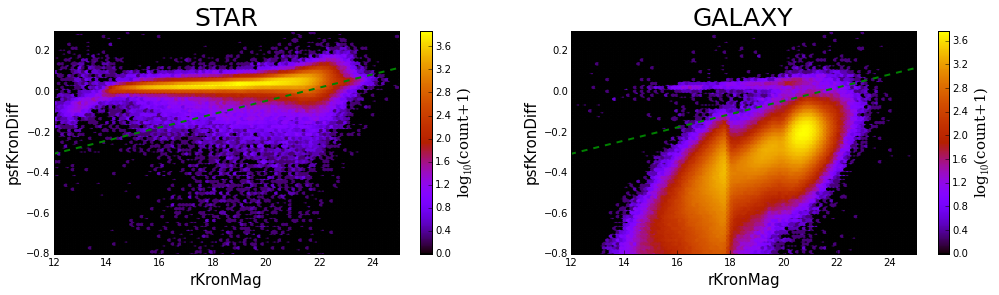

In [41]:
xval1 = PS_mag.rKronMag[star]; yval1 = PS_mag.mean_psfKronDiff[star]
xval2 = PS_mag.rKronMag[galaxy]; yval2 = PS_mag.mean_psfKronDiff[galaxy]
extent = [12,25,-0.8,0.3]
xlab = 'rKronMag'; ylab = 'psfKronDiff'; zlab='log$_{10}$(count+1)'

plt_hexbin_star_galaxy_with_threshold(xval1, yval1, xval2, yval2, extent, xlab, ylab, 
                                      0.03257589, -0.2256163, zlab=zlab, bins='log')
plt.show(); plt.close()

In [42]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [43]:
GT = np.ones(len(PS_mag))
GT[galaxy] = 0

In [44]:
def calc_acu_line(par, mag = PS_mag.rKronMag, ratio = PS_mag.mean_psfKronDiff, 
                  true=GT): # model = par[0]*(mag - 14.5) + par[1]
    a, b = np.array(par[0]), np.array(par[1])
    mag, ratio = np.array(mag), np.array(ratio)
    thre = a*(mag-14.5)+b  
    st = ratio >= thre; gl = ratio < thre
    pred = np.ones(len(mag))
    pred[gl] = 0
    return accuracy_score(true, pred)

In [45]:
acu = calc_acu_line([0.03257589, -0.2256163])
print 'Overall accuracy is %1.4f' % acu

Overall accuracy is 0.9878


In [46]:
def plot_accuracy(data_mag_list, data_type_list, Class, thre, source, Bin_Num, xlab, col, rev=False):
    data_mag_all = np.array(data_mag_list)
    data_type_all = np.array(data_type_list)
    Class = np.array(Class)
    mag_min = 14.5
    mag_max = 23.5
    bin_num = Bin_Num
    mags = np.linspace(mag_min , mag_max, bin_num)
    ratio = np.zeros(len(mags)-1)
    mag_ave = np.zeros(len(mags)-1)
    mask_det = np.isnan(data_mag_all)==False
    data_mag = data_mag_all[mask_det]
    data_type = data_type_all[mask_det]
    mask_star = data_type > thre[mask_det]
    data_type[mask_star] = 1.0
    data_type[mask_star==False] = 0.0
    for i in range(0, (len(mags)-1)):
        mask_mag1_i = data_mag >= mags[i]
        mask_mag2_i = data_mag < mags[i+1]
        mask_i = mask_mag1_i & mask_mag2_i
        ratio[i] = accuracy_score(np.array(Class[mask_i]).astype(float), np.array(data_type[mask_i]))
        mag_ave[i] = (mags[i]+mags[i+1])/2
    plt.plot(mag_ave, ratio, '--o', color=col, linewidth=3.0, label=source)
    plt.grid(True)
    plt.xlim(mag_min, mag_max)
    plt.ylim(0,1.25)
    plt.xlabel(xlab , fontname='serif')
    plt.ylabel("Accuracy" , fontname='serif')
    plt.hist(np.array(data_mag), bins=bin_num, range=(mag_min, mag_max), normed=1, 
             color=col, alpha=0.5)
    plt.legend(loc="upper right")

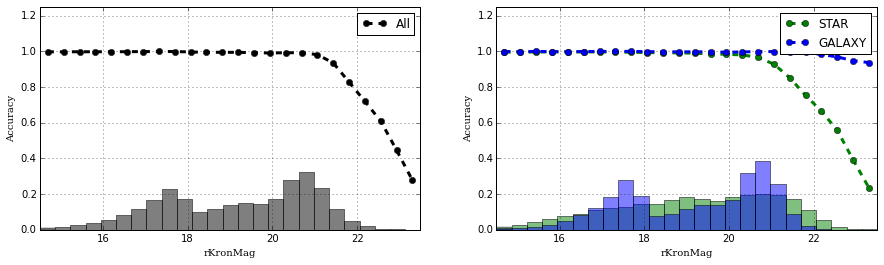

In [47]:
Thre = (PS_mag.rKronMag-14)*0.03257589-0.2256163
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plot_accuracy(PS_mag.rKronMag, PS_mag.mean_psfKronDiff, \
              GT, Thre, 'All', 25, 'rKronMag', col='black')
plt.legend()

plt.subplot(1,2,2)
plot_accuracy(PS_mag.rKronMag[star], 
              PS_mag.mean_psfKronDiff[star],\
              GT[star], Thre[star], 'STAR', 25,  'rKronMag', col='green')
plot_accuracy(PS_mag.rKronMag[galaxy], 
              PS_mag.mean_psfKronDiff[galaxy],\
              GT[galaxy], Thre[galaxy], 'GALAXY', 25,  'rKronMag', col='blue')
plt.legend()
plt.show()

In [48]:
def  calc_chi_from_thre(a, b, x, xerr, y, yerr): # model: y = a(x-14.5)+b
    a, b = np.array(a), np.array(b)
    model = (a*(x-14.5)+b).astype(float)
    model_diff = a
    chi = (y - model)/np.sqrt(yerr**2 + (model_diff*xerr)**2)
    return np.array(chi)

In [49]:
arg = [PS_mag.rKronMag, PS_mag.rKronMagErr, PS_mag.mean_psfKronDiff, PS_mag.mean_psfKronDifferr]

dist = calc_chi_from_thre(0.03257589, -0.2256163, arg[0], 1, arg[2], 1) 
chi = calc_chi_from_thre(0.03257589, -0.2256163, arg[0], arg[1], arg[2], arg[3]) 
rocDist = roc_auc_score(GT, dist) # distance scoring
rocChi = roc_auc_score(GT, chi) # $\chi$ scoring

print 'ROC AUC score using distance is %1.4f' %rocDist
print 'ROC AUC score using weighted distance is %1.4f' %rocChi

fprDist, tprDist, threshDist = roc_curve(GT, dist)
fprChi, tprChi, threshChi = roc_curve(GT, chi)

print 'The informedness using distance is %1.4f' %np.max(tprDist-fprDist)
print 'The informedness using weighted distance is %1.4f' %np.max(tprChi-fprChi)

faint_mask = PS_mag.rKronMag > 21
fprDist_faint, tprDist_faint, threshDist_faint = roc_curve(GT[faint_mask], dist[faint_mask])
fprChi_faint, tprChi_faint, threshChi_faint = roc_curve(GT[faint_mask], chi[faint_mask])

ROC AUC score using distance is 0.9971
ROC AUC score using weighted distance is 0.9970
The informedness using distance is 0.9825
The informedness using weighted distance is 0.9861


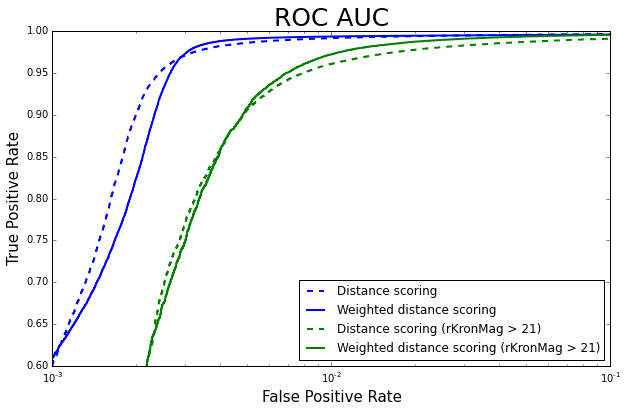

In [50]:
plt.figure(figsize=(10,6))
font = 'sans-serif'
plt.plot(fprDist, tprDist, '--', label='Distance scoring', lw=2, color='blue')
plt.plot(fprChi, tprChi, label='Weighted distance scoring', lw=2, color='blue')
plt.plot(fprDist_faint, tprDist_faint,  '--', label='Distance scoring (rKronMag > 21)', lw=2, color='green')
plt.plot(fprChi_faint, tprChi_faint, label='Weighted distance scoring (rKronMag > 21)', lw=2, color='green')
plt.title('ROC AUC', fontname=font, fontsize=25)
plt.xlabel('False Positive Rate', fontname=font, fontsize=15)
plt.ylabel('True Positive Rate', fontname=font, fontsize=15)
plt.xlim(1e-3,1e-1);plt.ylim(0.6,1)
plt.xscale('log');plt.yscale('linear')
plt.legend(loc='lower right')
plt.show(); plt.close()